## Importing libraries and data sets

In [856]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [857]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [858]:
leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [859]:
leads.info()
## Basic data check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [860]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [861]:
leads.shape

(9240, 37)

# Data Understanding and Cleaning:

In [862]:
leads.dtypes
## Checking the data types of columns

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [863]:
leads[['Specialization','Lead Profile','City']].value_counts()
## Checking the row values of different columns

Specialization                     Lead Profile                 City                       
Select                             Select                       Select                         1516
Finance Management                 Select                       Mumbai                          282
Human Resource Management          Select                       Mumbai                          219
Marketing Management               Select                       Mumbai                          207
Finance Management                 Potential Lead               Mumbai                          117
                                                                                               ... 
Banking, Investment And Insurance  Dual Specialization Student  Thane & Outskirts                 1
IT Projects Management             Student of SomeSchool        Tier II Cities                    1
International Business             Dual Specialization Student  Other Metro Cities                1
        

### Insights:
* **Here, many  columns have "Select" as row values.**
* **These row values provide us with no information and thus are practically null values.**

In [864]:
leads = leads.replace('Select', np.nan)
## Since, "Select" is practically useless, we impute it as a null value.

In [865]:
print("Unique row values in Prospect ID:",len(leads["Prospect ID"].unique()))
print("Unique row values in Lead Number:",len(leads["Lead Number"].unique()))
print("Total Number of rows:",leads.shape[0])

Unique row values in Prospect ID: 9240
Unique row values in Lead Number: 9240
Total Number of rows: 9240


### Insights:
* **Columns "Prospect ID" and "Lead Number are unique codes for each lead."**
* **i.e Atleast one of them is useless.**

In [866]:
leads.drop(["Prospect ID"],1,inplace=True)
## Dropping "Prospect ID" column.

In [867]:
(leads.isnull().sum())*100/(leads.shape[0])
## Percentage NUll values per Column

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [868]:
a=0
for i in leads.columns:
    if (((leads[i].isnull().sum())*100/(leads.shape[0])) > 40.00):
        leads.drop([i],1,inplace=True)
## Dropping columns having more than 40% null values.

In [869]:
(leads.isnull().sum())*100/(leads.shape[0])
## Cross-checking percentage Null values per Column

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

# Sectional analysis of categorical columns:

In [870]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [871]:
plt.style.use("ggplot")

In [872]:
leads.columns
## Checking the different attributes

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [873]:
Cnt=leads["Country"].value_counts(dropna=False,normalize=True)
## Percentage of unique value in "Country" attribute

In [874]:
Cnt=pd.DataFrame(Cnt)

<Figure size 1600x1600 with 0 Axes>

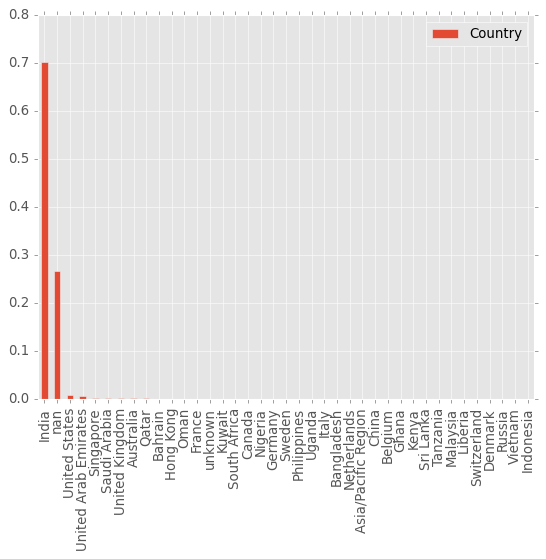

<Figure size 640x480 with 0 Axes>

In [875]:
plt.figure(figsize=(20,20))
Cnt.plot(kind="bar",fontsize=12)
fig = plt.figure()
spacing1 = 0.800
spacing2 = 0.900
fig.subplots_adjust(bottom=spacing1,top=spacing2)
plt.show()
## Distribution of values

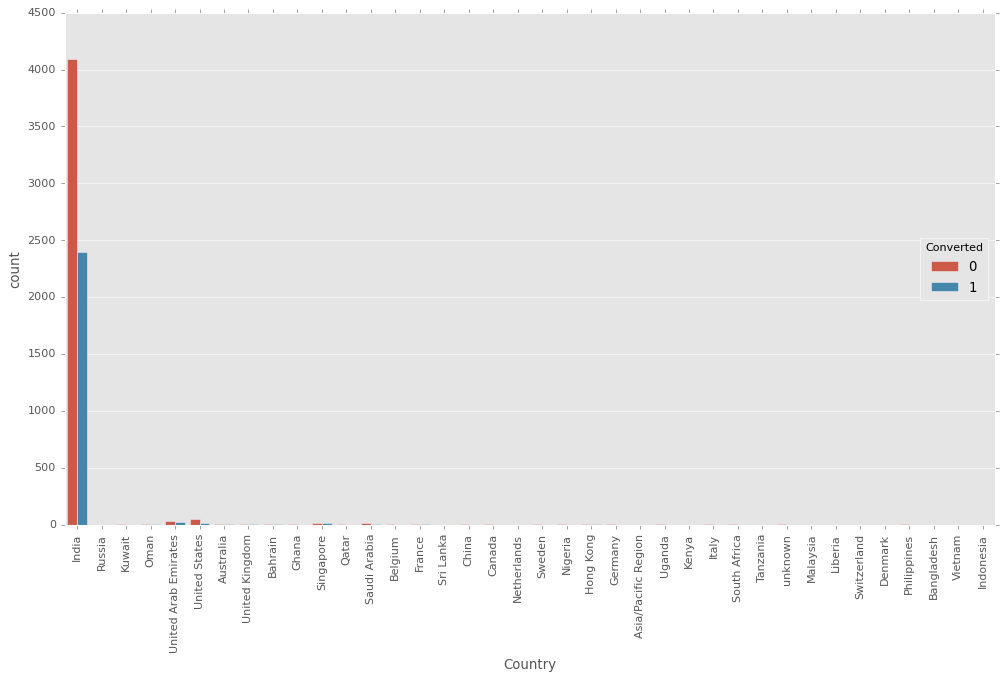

In [876]:
plt.figure(figsize=(15,8))
sns.countplot(leads["Country"],hue=leads["Converted"])
plt.xlabel("Country")
plt.xticks(rotation = 90)
plt.legend(loc='center right', title='Converted')
plt.show()
## Bargraph of spread of "Country"

### Insights:
* **Here, from both the graphs we can conclude that the attribute "Country" has a lot of null values and also the remaining data is highly imbalanced.**

In [877]:
leads.drop(["Country"],1,inplace=True)
## Droppping the country column

In [878]:
City=leads["City"].value_counts(dropna=False,normalize=True)
## Percentage of unique value in "City" attribute

In [879]:
City=pd.DataFrame(City)
City

,City
NaN,0.397078
Mumbai,0.348701
Thane & Outskirts,0.081385
Other Cities,0.074242
Other Cities of Maharashtra,0.049459
Other Metro Cities,0.041126
Tier II Cities,0.008009


<Figure size 1600x1600 with 0 Axes>

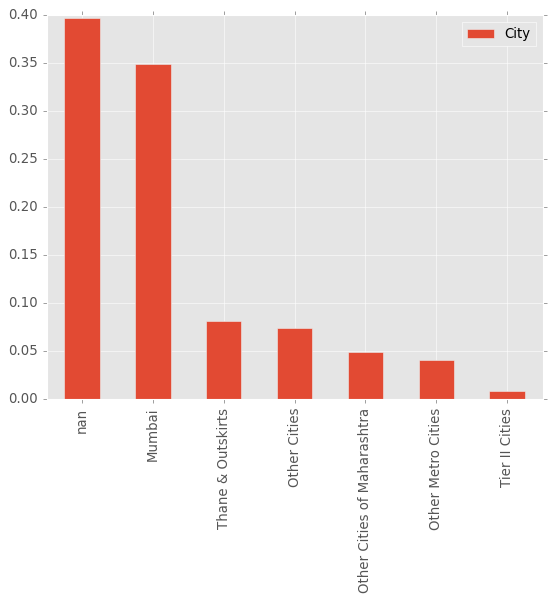

<Figure size 640x480 with 0 Axes>

In [880]:
plt.figure(figsize=(20,20))
City.plot(kind="bar",fontsize=12)
fig = plt.figure()
spacing1 = 0.800
spacing2 = 0.900
fig.subplots_adjust(bottom=spacing1,top=spacing2)
plt.show()
## Distribution of values

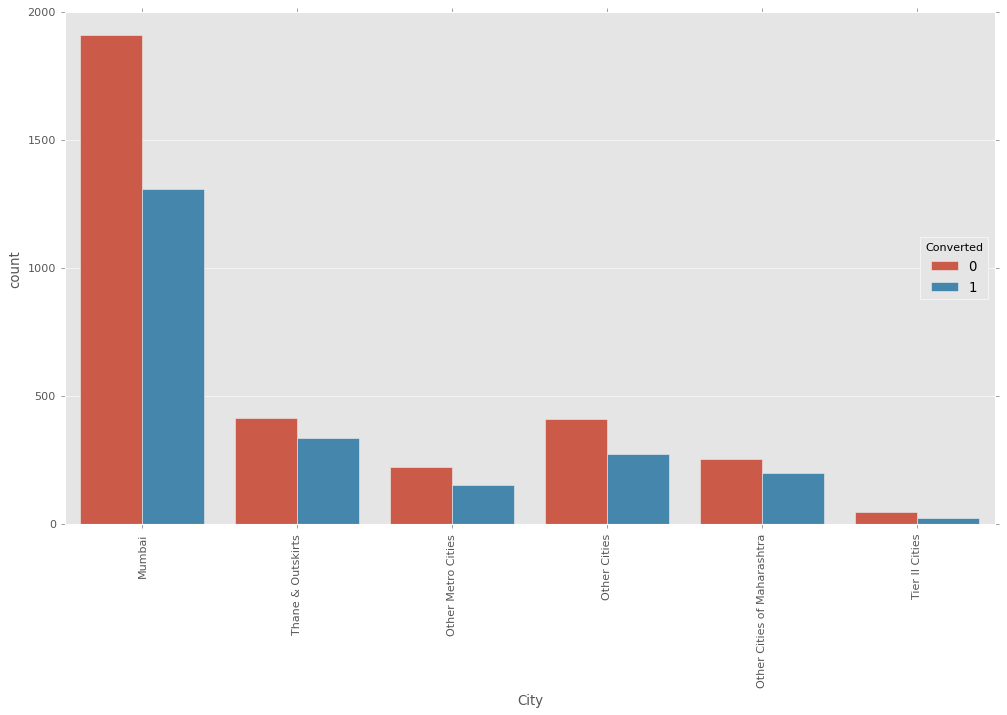

In [881]:
plt.figure(figsize=(15,8))
sns.countplot(leads["City"],hue=leads["Converted"])
plt.xlabel("City")
plt.xticks(rotation = 90)
plt.legend(loc='center right', title='Converted')
plt.show()
## Bargraph of spread of "City"

### Insights:
* **Around 40% fo data in "City" attribute consists of null values and from the remaining around 35% is concentrated in Mumbai.**
* **It is clear that this column is not of much significance.**

In [882]:
leads.drop(["City"],1,inplace=True)
## Dropping the "City" column

In [883]:
for i in leads.columns:
    print(i,":",len(leads[i].unique()))
## Checking attributes and their unique values

Lead Number : 9240
Lead Origin : 5
Lead Source : 22
Do Not Email : 2
Do Not Call : 2
Converted : 2
TotalVisits : 42
Total Time Spent on Website : 1731
Page Views Per Visit : 115
Last Activity : 18
Specialization : 19
What is your current occupation : 7
What matters most to you in choosing a course : 4
Search : 2
Magazine : 1
Newspaper Article : 2
X Education Forums : 2
Newspaper : 2
Digital Advertisement : 2
Through Recommendations : 2
Receive More Updates About Our Courses : 1
Tags : 27
Update me on Supply Chain Content : 1
Get updates on DM Content : 1
I agree to pay the amount through cheque : 1
A free copy of Mastering The Interview : 2
Last Notable Activity : 16


### Insights:
* **Here, we can observe that there are a few columns that have the same value for an entire column.**
* **Meaning, we get no new information from such columns.**

In [884]:
for i in leads.columns:
    if len(leads[i].unique())==1:
        leads.drop([i],1,inplace=True)
## Dropping columns which have only 1 unique value

In [885]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [886]:
leads.columns
## Remaining columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [887]:
leads.shape
## Checking the current dimentions of dataset

(9240, 22)

In [888]:
leads["Lead Origin"].value_counts(dropna=False)
## Looks like this column needs no changes


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

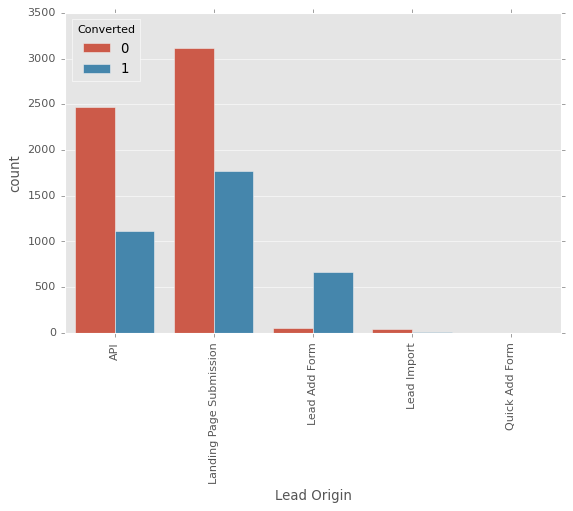

In [889]:
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()
## visualizing count of Variable based on Converted valu

In [890]:
leads["Lead Origin"].value_counts(dropna=False)
## Looks like this column needs no changes

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [891]:
leads["Lead Source"].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

### Insights:
* Too many attributes with low frequency in the column. Let's try and reduce them 

In [892]:
less_count=["bing",'Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM']
leads["Lead Source"]=leads["Lead Source"].replace(less_count,"Others")
leads["Lead Source"]=leads["Lead Source"].replace("google","Google")
leads["Lead Source"]=leads["Lead Source"].replace(np.nan,"Others")
## Imputinng and reducing the number of columns

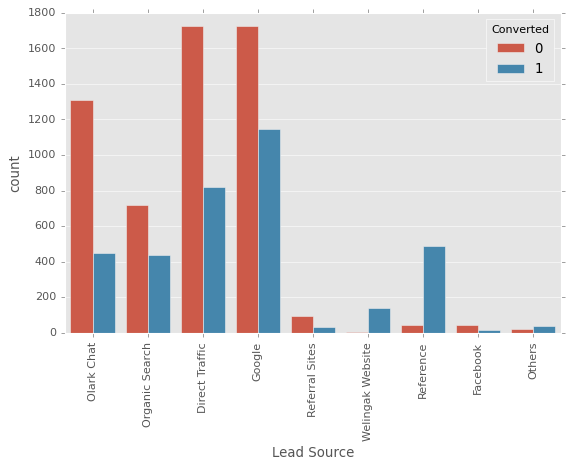

In [893]:
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()
## visualizing count of Variable based on Converted valu

In [894]:
leads["Do Not Email"].value_counts(dropna=False)
## Looks like this column needs no changes

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [895]:
leads["Do Not Call"].value_counts(dropna=False)
## Data looks highly skewed

No     9238
Yes       2
Name: Do Not Call, dtype: int64

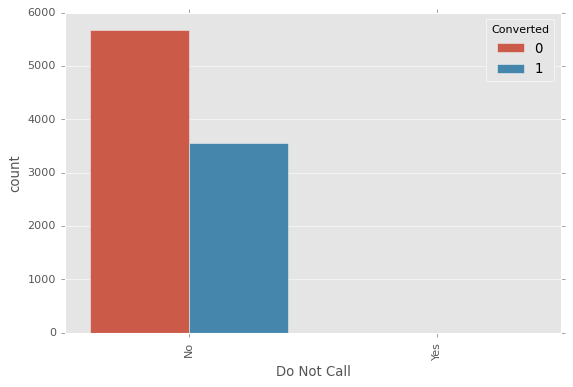

In [896]:
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()
## visualizing count of Variable based on Converted value

### Insights:
* Here, the data is highly imbalanced, let us drop this column

In [897]:
Q=['Do Not Call','Country','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','What matters most to you in choosing a course']

for i in leads.columns:
    for j in Q:
        if i==j:
            print(i)

Do Not Call
What matters most to you in choosing a course
Search
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations


In [898]:
leads.drop(["Do Not Call"],1,inplace=True)
## Dropping the "Do not call" column

In [899]:
leads["Last Activity"].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

### Insights: 
* Again, too many attributes with low frequency. Let's try and reduce them

In [900]:
low_count=['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails']
leads["Last Activity"]=leads["Last Activity"].replace(low_count,"Others")
leads["Last Activity"]=leads["Last Activity"].replace(np.nan,"Others")
## Imputinng and reducing the number of columns

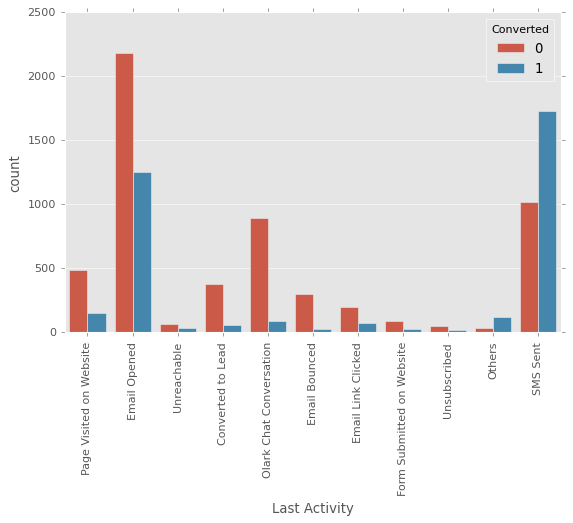

In [901]:
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Last Activity'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()
## visualizing count of Variable based on Converted value

In [902]:
leads["Specialization"].value_counts(dropna=False)
## Here we see a large number of null values

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [903]:
leads["Specialization"]=leads["Specialization"].replace(np.nan,"Not Specified")
## Replacing the null values

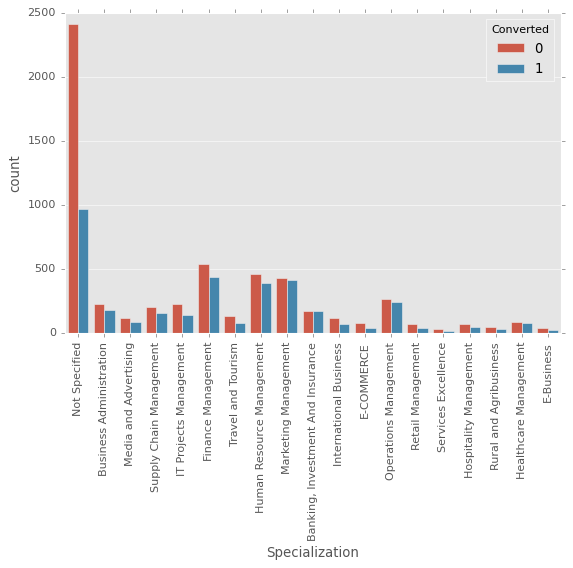

In [904]:
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Specialization'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()
## visualizing count of Variable based on Converted value

### Insights:
* There are still too many attributes in a single column.
* Here, we observe that the specialisations in any kind of **management**, has a good churn value. Let us combine them together. 

In [905]:
Management_speciali=['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management']
leads['Specialization'] = leads['Specialization'].replace(Management_speciali,'Management_Specializations')
## Combining all kinds of management specializations

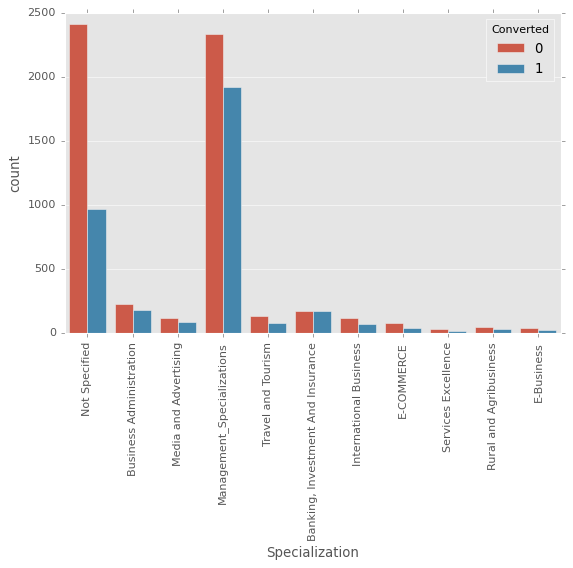

In [906]:
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Specialization'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()
## visualizing count of Variable based on Converted value

In [907]:
leads["What is your current occupation"].value_counts(dropna=False)
## We see a large number of null values here as well.

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

### Insights:
* Here, there is a high possibility that the null values are because the user were't employed and/or were at a stage that did not fit the remaining options.
* Thus, we can impute the null values, assuming, the users here are not employed

In [908]:
leads["What is your current occupation"]=leads["What is your current occupation"].replace(np.nan,"Unemployed")
## Replacing the null values with Unemployed

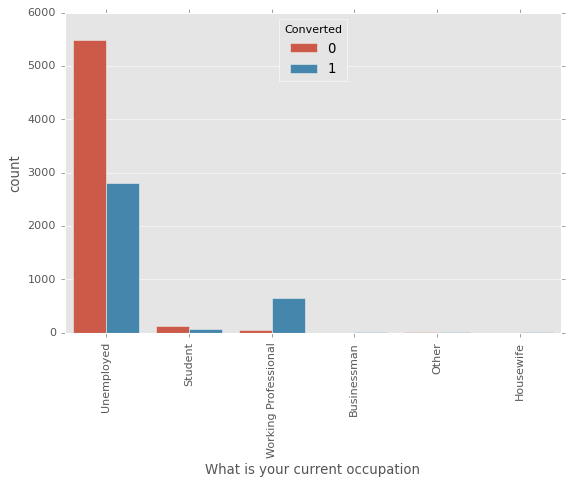

In [909]:
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()
## visualizing count of Variable based on Converted value`

### Dropping rows due to high data imbalance:

In [910]:
leads["What matters most to you in choosing a course"].value_counts(dropna=False)
## This has a large number of null values

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

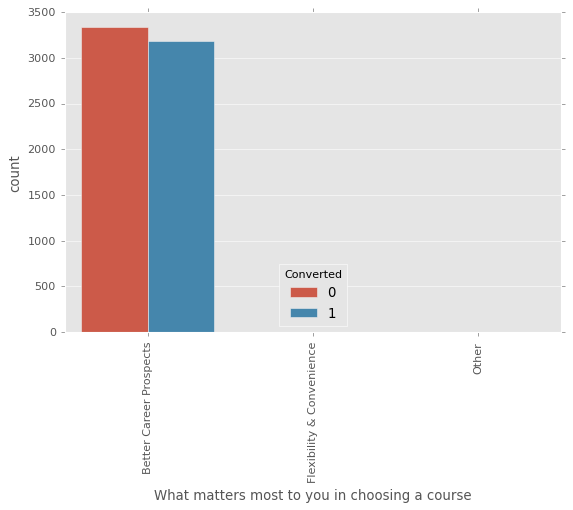

In [911]:
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()
## visualizing count of Variable based on Converted value

### Insights:
* The data highly imbalanced and also has a large number of null values that can't be dealth with due to the imbalance.
* Let's drop the column.

In [912]:
leads.drop(["What matters most to you in choosing a course"],1,inplace=True)
## Dropping the column 

In [913]:
leads["Search"].value_counts(dropna=False)
# We see a highly skewed data

No     9226
Yes      14
Name: Search, dtype: int64

### Insights:
* We can already see that there is a lot of data imbalance here. Let's drop the column.

In [914]:
leads.drop(["Search"],1,inplace=True)
## Dropping the "Search" attribute

In [915]:
leads["Newspaper Article"].value_counts(dropna=False,normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

### Insights:
* We can already see that there is a lot of data imbalance here. Let's drop the column.

In [916]:
leads.drop(["Newspaper Article"],1,inplace=True)
## Dropping the column

In [917]:
leads["X Education Forums"].value_counts(dropna=False)
## We again, see a highly imbalanced column

No     9239
Yes       1
Name: X Education Forums, dtype: int64

### Insights:
* **Again**, We can already see that there is a lot of data imbalance here. Let's drop the column.

In [918]:
leads.drop(["X Education Forums"],1,inplace=True)
## Dropping the column

In [919]:
leads["Newspaper"].value_counts(dropna=False)
## Again, highly imbalanced data.

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [920]:
leads.drop(["Newspaper"],1,inplace=True)
## Dropping the column due to data imbalance

In [921]:
leads["Digital Advertisement"].value_counts(dropna=False,normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [922]:
leads.drop(["Digital Advertisement"],1,inplace=True)
## Dropping the column due to data imbalance

In [923]:
leads["Through Recommendations"].value_counts(dropna=False,normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [924]:
leads.drop(["Through Recommendations"],1,inplace=True)
## Dropping the column due to data imbalance

In [925]:
leads["Tags"].value_counts(dropna=False)
## Many attributes in a single column

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

### Insights:
* There are many columns with low frequencies, let us try and to reduce them

In [926]:
tags_comb=["in touch with EINS","Lost to Others","Still Thinking","Want to take admission but has financial problems","In confusion whether part time or DLP","Interested in Next batch","Lateral student","Shall take in the next coming month","University not recognized","Recognition issue (DEC approval)"]
leads["Tags"]=leads["Tags"].replace(tags_comb,"Other Responses")
leads["Tags"]=leads["Tags"].replace(np.nan,"Not Specified")
## Clubbing low frequency atrributes together

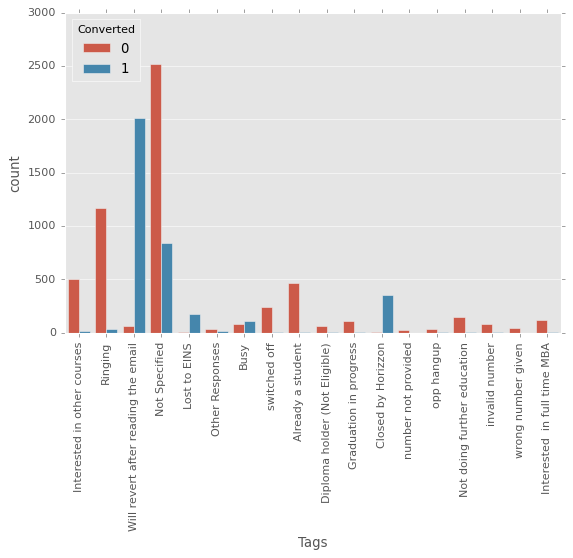

In [927]:
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()
## visualizing count of Variable based on Converted value`

In [928]:
leads["A free copy of Mastering The Interview"].value_counts(dropna=True)
## Appears that this column needs no change.

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [929]:
leads["Last Notable Activity"].value_counts(dropna=True)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

### Insights:
* Many attributes with a low frequency. Let's club them together.

In [930]:
Low_Notable=["Had a Phone Conversation","Approached upfront","Resubscribed to emails","View in browser link Clicked","Form Submitted on Website","Email Received","Email Marked Spam"]
leads["Last Notable Activity"]=leads["Last Notable Activity"].replace(Low_Notable,"Other Notable Activities")
## Clubbing the low variable attributes together.

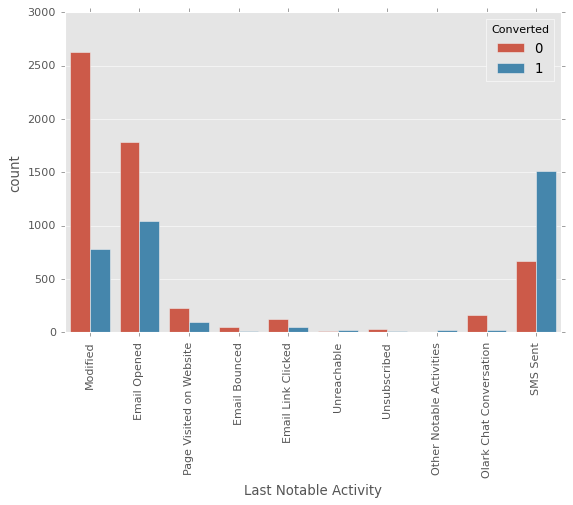

In [931]:
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Last Notable Activity'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()
## visualizing count of Variable based on Converted value`

In [932]:
leads.columns
## Remaining columns after cleaning categorical columns 

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [933]:
leads.shape
## Remaining shape after cleaning categorical columns

(9240, 14)

# Sectional analysis of numerical columns

In [934]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [935]:
(sum(leads['Converted'])/len(leads['Converted'].index))*100
## Checking the data imbalance for the Target i.e (Converted) column.

38.53896103896104

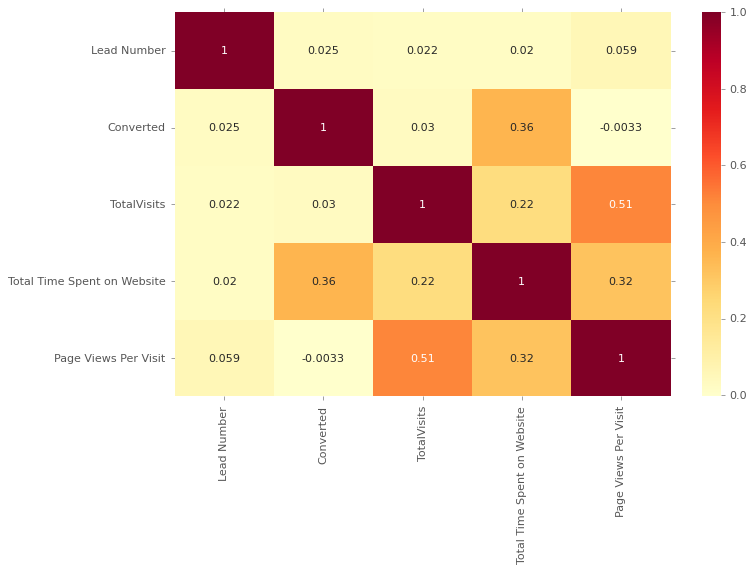

In [936]:
plt.figure(figsize=(10,6))

sns.heatmap(leads.corr(), cmap="YlOrRd", annot=True)
plt.show()
## Corelation heatmap for numerical variables

In [937]:
num_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
leads[num_vars].describe([0.25,0.75,0.90,0.95,0.99])
## Understanding spread of numerical variables

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


## Insights:
* Here we observe that in each of the numerical column there are a lot of outliers.
* We must deal with each of the column for these outliers in order to aavoid inaccurate results.

## Outlier Tratement:

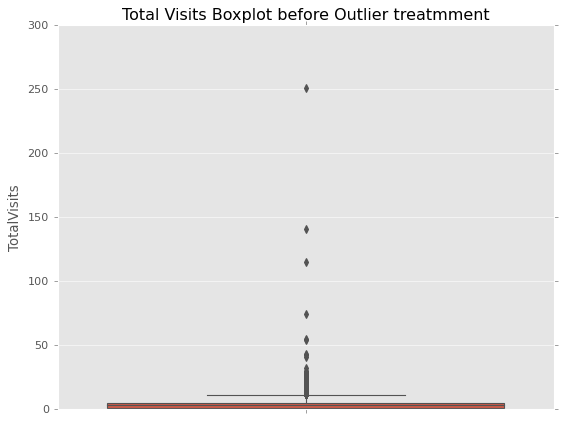

In [938]:
plt.figure(figsize=(8,6))

sns.boxplot(y=leads["TotalVisits"])
plt.title("Total Visits Boxplot before Outlier treatmment")
plt.show()
## Boxplot for "TotalVisits" column before outlier treatment

In [939]:
Q1 = leads["TotalVisits"].quantile(0.05)
Q3 = leads["TotalVisits"].quantile(0.90)
IQR = Q3 - Q1
Lower_bound=(Q1- IQR*1.5)
Upper_bound=(Q3+ IQR*1.5)
leads = leads[(leads["TotalVisits"] >= Lower_bound) & (leads["TotalVisits"] <= Upper_bound)]
## Treating outliers using the IQR technique

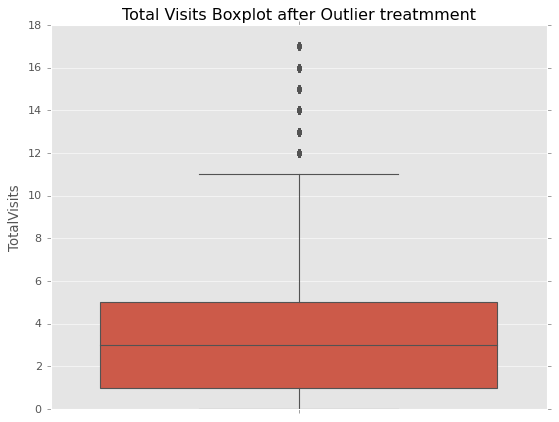

In [940]:
plt.figure(figsize=(8,6))

sns.boxplot(y=leads["TotalVisits"])
plt.title("Total Visits Boxplot after Outlier treatmment")
plt.show()
## Boxplot for "TotalVisits" column after outlier treatment

In [941]:
leads.shape
## Remaning shape of the dataframe

(9020, 14)

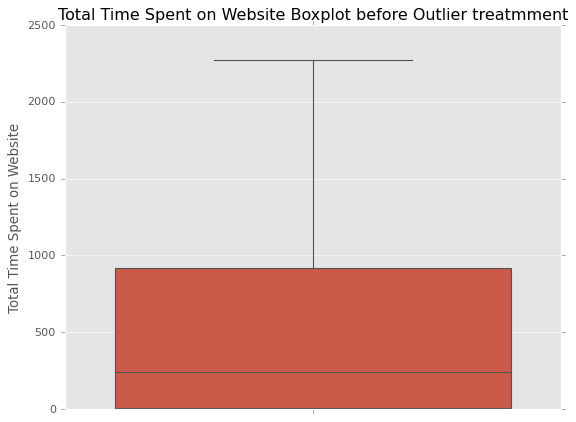

In [942]:
plt.figure(figsize=(8,6))

sns.boxplot(y=leads["Total Time Spent on Website"])
plt.title("Total Time Spent on Website Boxplot before Outlier treatmment")
plt.show()
## Boxplot for "Total Time Spent on Website" column before outlier treatment

In [943]:
Q1 = leads["Total Time Spent on Website"].quantile(0.05)
Q3 = leads["Total Time Spent on Website"].quantile(0.90)
IQR = Q3 - Q1
Lower_bound=(Q1- IQR*1.5)
Upper_bound=(Q3+ IQR*1.5)
leads = leads[(leads["Total Time Spent on Website"] >= Lower_bound) & (leads["Total Time Spent on Website"] <= Upper_bound)]
## Treating outliers using the IQR technique

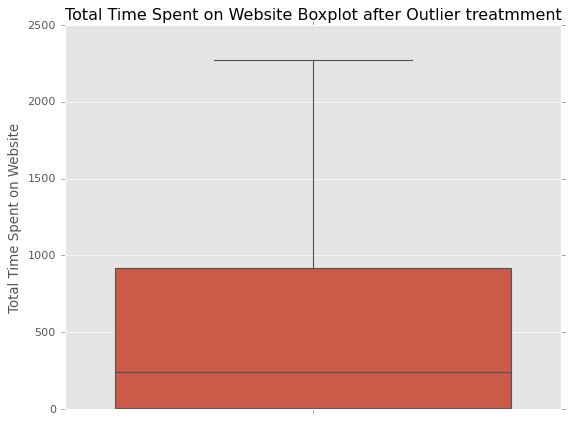

In [944]:
plt.figure(figsize=(8,6))

sns.boxplot(y=leads["Total Time Spent on Website"])
plt.title("Total Time Spent on Website Boxplot after Outlier treatmment")
plt.show()
## Boxplot for "Total Time Spent on Website" column after outlier treatment

In [945]:
leads.shape
## Remaning shape of the dataframe

(9020, 14)

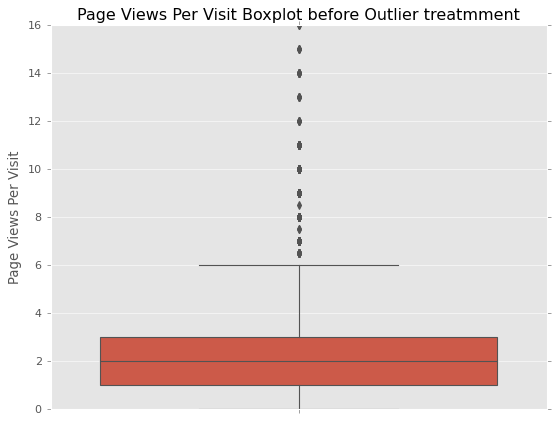

In [946]:
plt.figure(figsize=(8,6))

sns.boxplot(y=leads["Page Views Per Visit"])
plt.title("Page Views Per Visit Boxplot before Outlier treatmment")
plt.show()
## Boxplot for "Page Views Per Visit" column before outlier treatment

In [947]:
Q1 = leads["Page Views Per Visit"].quantile(0.05)
Q3 = leads["Page Views Per Visit"].quantile(0.90)
IQR = Q3 - Q1
Lower_bound=(Q1- IQR*1.5)
Upper_bound=(Q3+ IQR*1.5)
leads = leads[(leads["Page Views Per Visit"] >= Lower_bound) & (leads["Page Views Per Visit"] <= Upper_bound)]
## Treating outliers using the IQR technique

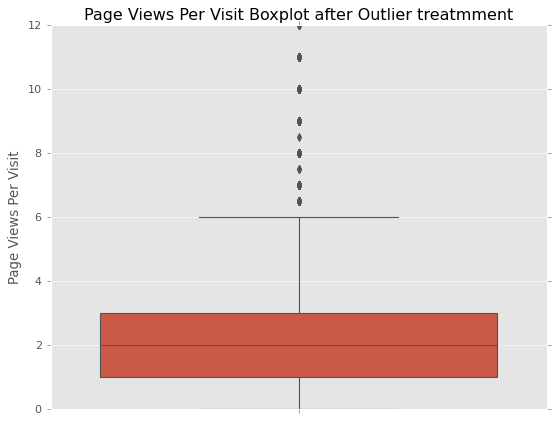

In [948]:
plt.figure(figsize=(8,6))

sns.boxplot(y=leads["Page Views Per Visit"])
plt.title("Page Views Per Visit Boxplot after Outlier treatmment")
plt.show()
## Boxplot for "Page Views Per Visit" column after outlier treatment

In [949]:
leads.shape

(8999, 14)

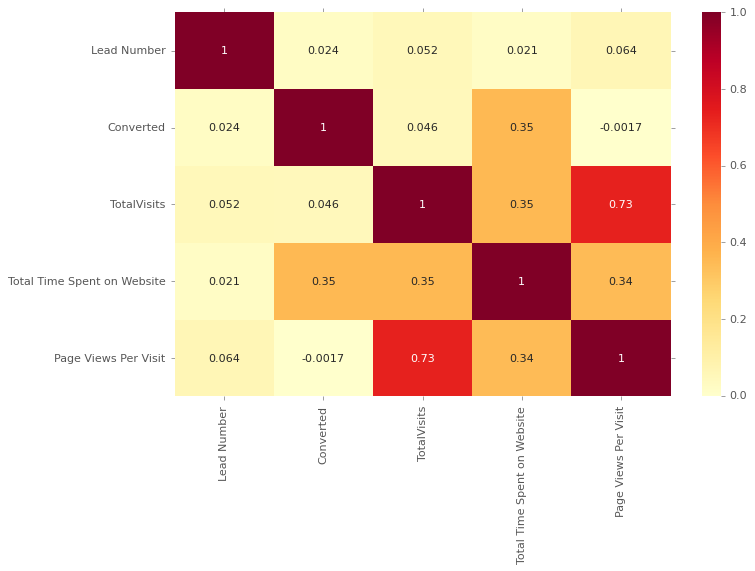

In [950]:
plt.figure(figsize=(10,6))

sns.heatmap(leads.corr(), cmap="YlOrRd", annot=True)
plt.show()
## Corelation heatmap for numerical variables after outlier treatment

In [951]:
num_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
leads[num_vars].describe([0.25,0.75,0.90,0.95,0.99])
## Understanding spread of numerical variables

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8999.000000,8999.000000,8999.000000
mean,3.181242,479.155684,2.309499
std,2.945293,544.378536,1.982360
min,0.000000,0.000000,0.000000
25%,1.000000,6.000000,1.000000
50%,3.000000,242.000000,2.000000
75%,5.000000,913.500000,3.000000
90%,7.000000,1371.000000,5.000000
95%,9.000000,1553.000000,6.000000
99%,13.000000,1837.040000,9.000000


In [952]:
leads.isnull().sum()
## Cross-Checking null values for each column

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

## Insights:
* We see that no column has any null values present anymore.

### Visualizing the numerical columns frequency:

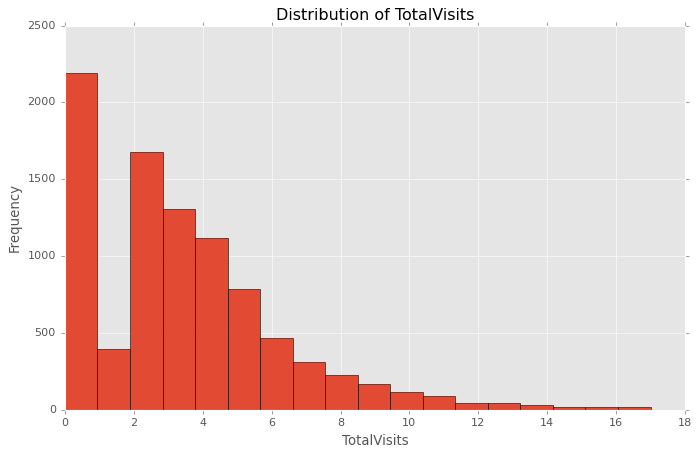

In [953]:
plt.figure(figsize=(10,6))
leads["TotalVisits"].plot.hist(edgecolor = 'k',bins=(len(leads["TotalVisits"].unique())))
plt.title("Distribution of TotalVisits")
plt.xlabel("TotalVisits")
plt.show()
## Histogram for "TotalVisits"

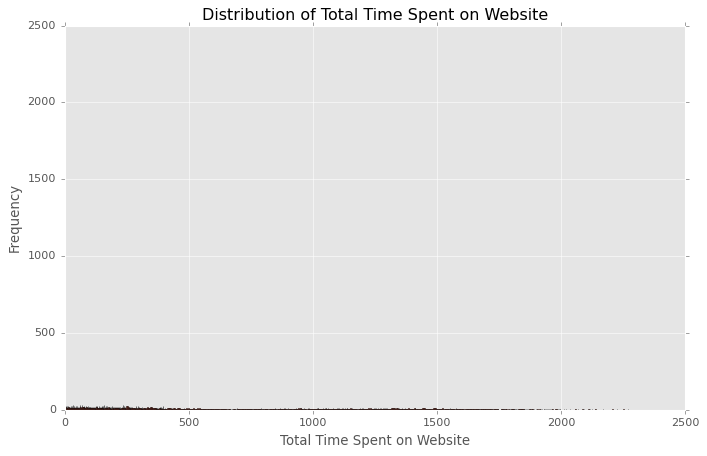

In [954]:
plt.figure(figsize=(10,6))
leads["Total Time Spent on Website"].plot.hist(edgecolor = 'k',bins=(len(leads["Total Time Spent on Website"].unique())))
plt.title("Distribution of Total Time Spent on Website")
plt.xlabel("Total Time Spent on Website")
plt.show()
## Histogram for "Total Time Spent on Website"

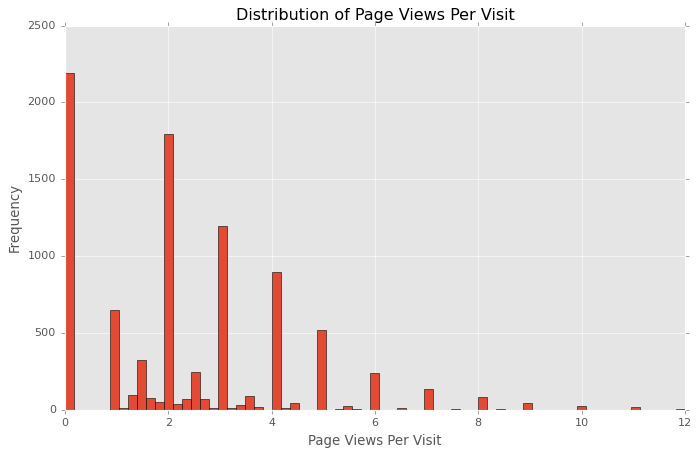

In [955]:
plt.figure(figsize=(10,6))
leads["Page Views Per Visit"].plot.hist(edgecolor = 'k',bins=(len(leads["Page Views Per Visit"].unique())))
plt.title("Distribution of Page Views Per Visit")
plt.xlabel("Page Views Per Visit")
plt.show()
## Histogram for "Page Views Per Visit"

### Target Variable Visualization:

In [956]:
pie_conv_count = round(leads['Converted'].value_counts(normalize=True),2)*100
pie_labels=["Not Converted","Converted"]

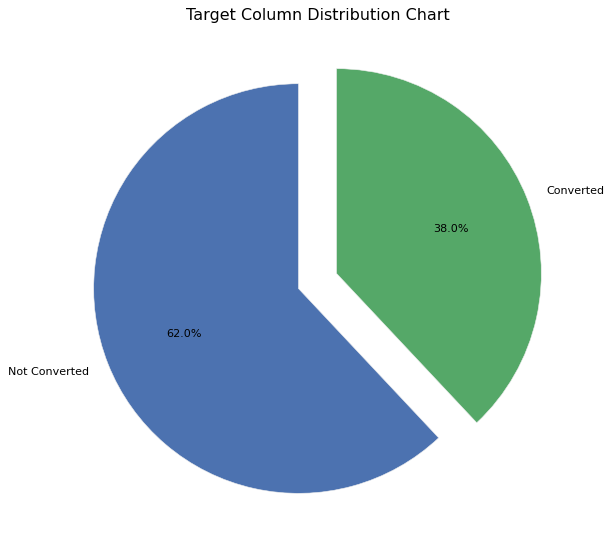

In [957]:
plt.style.use("seaborn-deep")
plt.figure(figsize=(10,8))
plt.pie(pie_conv_count,labels=pie_labels,explode =(0.1,0.1),autopct='%1.1f%%',startangle=90)
plt.title("Target Column Distribution Chart")
plt.show()
## Visualization for target variable

In [958]:
leads.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

# Data preparation(Part 1):

## Creating dummy variables:

In [959]:
leads.shape
## Shape of current dataset

(8999, 14)

In [960]:
leads.columns
## Current columns of dataset

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [961]:
cat_cols=[i for i in leads.columns if leads[i].dtype=="O"]
cat_cols
## List of Categorical columns present

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [962]:
leads["Lead Origin"].value_counts(dropna=True)
## Checking values of "Lead Origin"

Landing Page Submission    4803
API                        3558
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64

In [963]:
dummy_LO=pd.get_dummies(leads["Lead Origin"],drop_first=True,prefix="Lead_Origin")
leads=pd.concat([leads,dummy_LO],axis=1)

In [964]:
leads["Lead Source"].value_counts(dropna=True)
## Checking values of "Lead Source"

Google              2851
Direct Traffic      2507
Olark Chat          1751
Organic Search      1116
Reference            442
Welingak Website     129
Referral Sites       120
Others                52
Facebook              31
Name: Lead Source, dtype: int64

In [965]:
dummy_LS=pd.get_dummies(leads["Lead Source"],prefix="Lead_Source")
dummy_LS.drop(["Lead_Source_Others"],1,inplace=True)
leads=pd.concat([leads,dummy_LS],axis=1)
## Creating dummies for "Lead Source"

In [966]:
leads["Do Not Email"].value_counts(dropna=True)
## Checking values of "Do Not Email"

No     8295
Yes     704
Name: Do Not Email, dtype: int64

In [967]:
leads["Do Not Email"]=leads["Do Not Email"].apply(lambda x: 1 if x=="Yes" else 0)
leads["Do Not Email"].value_counts()

0    8295
1     704
Name: Do Not Email, dtype: int64

In [968]:
leads["Last Activity"].value_counts(dropna=True)
## Checking values of "Last Activity"

Email Opened                 3406
SMS Sent                     2717
Olark Chat Conversation       968
Page Visited on Website       600
Converted to Lead             428
Email Bounced                 311
Email Link Clicked            266
Form Submitted on Website     114
Unreachable                    88
Unsubscribed                   61
Others                         40
Name: Last Activity, dtype: int64

In [969]:
dummy_LA=pd.get_dummies(leads["Last Activity"],prefix="Last_Activity")
dummy_LA.drop(["Last_Activity_Others"],1,inplace=True)
leads=pd.concat([leads,dummy_LA],axis=1)
## Creating dummies for "Last Activity"

In [970]:
leads["Specialization"].value_counts(dropna=True)
## Checking values of "Specialization"

Management_Specializations           4151
Not Specified                        3289
Business Administration               392
Banking, Investment And Insurance     326
Media and Advertising                 198
Travel and Tourism                    195
International Business                173
E-COMMERCE                            109
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    40
Name: Specialization, dtype: int64

In [971]:
dummy_S=pd.get_dummies(leads["Specialization"],prefix="Specialization")
dummy_S.drop(["Specialization_Not Specified"],1,inplace=True)
leads=pd.concat([leads,dummy_S],axis=1)
## Creating dummies for "Specialization"

In [972]:
leads["What is your current occupation"].value_counts(dropna=True)
## Checking values of "What is your current occupation"

Unemployed              8091
Working Professional     672
Student                  206
Other                     13
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [973]:
dummy_CO=pd.get_dummies(leads["What is your current occupation"],prefix="Current_Occupation")
dummy_CO.drop(["Current_Occupation_Other"],1,inplace=True)
leads=pd.concat([leads,dummy_CO],axis=1)
## Creating dummies for "What is your current occupation"

In [974]:
leads["Tags"].value_counts(dropna=True)
## Checking values of "Tags"

Not Specified                          3301
Will revert after reading the email    2016
Ringing                                1168
Interested in other courses             506
Already a student                       462
Closed by Horizzon                      291
switched off                            237
Busy                                    184
Lost to EINS                            170
Not doing further education             138
Interested  in full time MBA            116
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
Other Responses                          48
wrong number given                       46
opp hangup                               33
number not provided                      26
Name: Tags, dtype: int64

In [975]:
dummy_T=pd.get_dummies(leads["Tags"],prefix="Tags")
dummy_T.drop(["Tags_Not Specified"],1,inplace=True)
leads=pd.concat([leads,dummy_T],axis=1)
## Creating dummies for "Tags"

In [976]:
leads["A free copy of Mastering The Interview"].value_counts(dropna=True)
## Checking values of "A free copy of Mastering The Interview"

No     6175
Yes    2824
Name: A free copy of Mastering The Interview, dtype: int64

In [977]:
leads["A free copy of Mastering The Interview"]=leads["A free copy of Mastering The Interview"].apply(lambda x: 1 if x=="Yes" else 0)
leads["A free copy of Mastering The Interview"].value_counts()

0    6175
1    2824
Name: A free copy of Mastering The Interview, dtype: int64

In [978]:
leads["Last Notable Activity"].value_counts(dropna=True)
## Checking values of "Last Notable Activity"

Modified                    3243
Email Opened                2800
SMS Sent                    2155
Page Visited on Website      289
Olark Chat Conversation      182
Email Link Clicked           172
Email Bounced                 59
Unsubscribed                  47
Unreachable                   32
Other Notable Activities      20
Name: Last Notable Activity, dtype: int64

In [979]:
dummy_LNA=pd.get_dummies(leads["Last Notable Activity"],prefix="Last_Notable_Activity")
dummy_LNA.drop(["Last_Notable_Activity_Other Notable Activities"],1,inplace=True)
leads=pd.concat([leads,dummy_LNA],axis=1)
## Creating dummies for "Last Notable Activity"

In [980]:
drop_cols=['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Last Notable Activity']
leads.drop(drop_cols,1,inplace=True)
## Dropping columns for which dummies are created.

In [981]:
leads.drop(["Lead Number"],1,inplace=True)
## Dropping the unique ID for columns

In [982]:
leads.shape

(8999, 68)

# Train-Test Split:

In [983]:
from sklearn.model_selection import train_test_split

In [984]:
y=leads.pop('Converted')
y.head()
X=leads
# Assigning response variable to y

In [985]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
## Performimg the test-train split

# Data Preparation (2):

## Scaling the training dataset using StandardScaler() :

In [986]:
num_vars= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
## Numerical Variables

In [987]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()
## Scaling the numerical variables using Standard Scaler()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,...,Tags_wrong number given,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
4730,1,-0.399805,-0.387704,-0.157354,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5804,0,-1.081736,-0.884754,-1.169903,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
900,0,0.623092,1.259347,1.361469,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7778,0,-0.399805,-0.325344,-0.157354,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7906,0,-0.058839,-0.446396,0.348920,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Model Building:

### Fiting a Logistic Regression Model for all the attributes:

In [988]:
import statsmodels.api as sm

In [989]:
# Logistic Regression Model
logm=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1159.3
Date:                Tue, 21 Mar 2023   Deviance:                       2318.6
Time:                        14:00:52   Pearson chi2:                 1.29e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6166
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.0654      2.453     -0.027      0.979      -4.873       4.743
Do Not Email                                        -0.9250      0.328     -2.816      0.005      -1.569      -0.281
TotalVisits                                          0.2247      0.083      2.707      0.007       0.062       0.387
Total Time Spent on Website                          1.0680      0.065     16.375      0.000       0.940       1.196
Page Views Per Visit                                -0.1479      0.092     -1.606      0.108      -0.328       0.033
A free copy of Mastering The Interview              -0.1492      0.189     -0.790      0.430      -0.519       0.221
Lead_Origin_Landing Page Submission                 -0.6206      0.246     -2.524      0.012      -1.102      -0.139
Lead_Origin_Lead Add Form                            1.7806      1.210      1.471      0.141      -0.592       4.153
Lead_Origin_Lead Import                             27.2314   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead_Source_Direct Traffic                          -0.8494      0.965     -0.881      0.379      -2.740       1.041
Lead_Source_Facebook                               -27.2073   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead_Source_Google                                  -0.7569      0.954     -0.793      0.428      -2.627       1.113
Lead_Source_Olark Chat                               0.1648      0.962      0.171      0.864      -1.721       2.050
Lead_Source_Organic Search                          -0.7644      0.969     -0.789      0.430      -2.664       1.135
Lead_Source_Reference                               -1.1651      1.087     -1.072      0.284      -3.295       0.965
Lead_Source_Referral Sites                          -0.7870      1.056     -0.745      0.456      -2.857       1.282
Lead_Source_Welingak Website                         2.5433      1.231      2.066      0.039       0.131       4.956
Last_Activity_Converted to Lead                     -0.8411      1.248     -0.674      0.500      -3.287       1.605
Last_Activity_Email Bounced                         -0.9961      1.404     -0.709      0.478      -3.749       1.756
Last_Activity_Email Link Clicked                     0.5222      1.301      0.401      0.688      -2.027       3.072
Last_Activity_Email Opened                          -0.6167      1.229     -0.502      0.616      -3.026       1.792
Last_Activity_Form Submitted on Website             -0.3880      1.304     -0.298      0.766      -2.943       2.167
Last_Activity_Olark Chat Conversation               -1.2298      1.229     -1.001      0.317      -3.638       1.178
Last_Activity_Page Visited on Website    

## Eliminating features using RFE:

In [990]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [991]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg,n_features_to_select= 15)             
rfe = rfe.fit(X_train, y_train)
## feature selection for 15 attributes

In [992]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False])

In [993]:
col = X_train.columns[rfe.support_]
col
## Top 15 Attributes selected through RFE

Index(['Lead_Source_Welingak Website', 'Last_Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'Last_Notable_Activity_Modified'],
      dtype='object')

In [994]:
X_train.columns[~rfe.support_]
## Features elemenated through RFE

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Source_Direct Traffic',
       'Lead_Source_Facebook', 'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Reference',
       'Lead_Source_Referral Sites', 'Last_Activity_Converted to Lead',
       'Last_Activity_Email Bounced', 'Last_Activity_Email Link Clicked',
       'Last_Activity_Email Opened', 'Last_Activity_Form Submitted on Website',
       'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Page Visited on Website', 'Last_Activity_Unreachable',
       'Last_Activity_Unsubscribed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_I

## Model 1:

In [995]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1400.7
Date:                Tue, 21 Mar 2023   Deviance:                       2801.4
Time:                        14:00:55   Pearson chi2:                 1.29e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5861
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3877      0.072    -19.371      0.000      -1.528      -1.247
Lead_Source_Welingak Website                 4.2366      0.753      5.628      0.000       2.761       5.712
Last_Activity_SMS Sent                       2.3473      0.109     21.606      0.000       2.134       2.560
Tags_Already a student                      -3.1927      0.713     -4.475      0.000      -4.591      -1.794
Tags_Closed by Horizzon                      7.2392      0.722     10.027      0.000       5.824       8.654
Tags_Interested in other courses            -1.7795      0.378     -4.702      0.000      -2.521      -1.038
Tags_Lost to EINS                            6.8087      0.726      9.382      0.000       5.386       8.231
Tags_Not doing further education            -2.5128      1.025     -2.451      0.014      -4.522      -0.504
Tags_Ringing                                -3.5446      0.234    -15.117      0.000      -4.004      -3.085
Tags_Will revert after reading the email     4.7863      0.174     27.444      0.000       4.445       5.128
Tags_invalid number                         -3.9394      1.025     -3.842      0.000      -5.949      -1.930
Tags_number not provided                   -24.2047   2.85e+04     -0.001      0.999   -5.59e+04    5.58e+04
Tags_opp hangup                             -2.0847      0.802     -2.600      0.009      -3.656      -0.513
Tags_switched off                           -4.5507      0.721     -6.312      0.000      -5.964      -3.138
Tags_wrong number given                    -24.2599   2.04e+04     -0.001      0.999   -4.01e+04       4e+04
Last_Notable_Activity_Modified              -1.9238      0.121    -15.909      0.000      -2.161      -1.687
============================================================================================================
"""

## Insights:
* p-value for Tags_number not provided is too high. Let's drop it.

In [996]:
col = col.drop('Tags_number not provided',1)

## Model 2:

In [997]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1408.6
Date:                Tue, 21 Mar 2023   Deviance:                       2817.2
Time:                        14:00:55   Pearson chi2:                 1.27e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5850
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3980      0.072    -19.522      0.000      -1.538      -1.258
Lead_Source_Welingak Website                 4.2462      0.752      5.646      0.000       2.772       5.720
Last_Activity_SMS Sent                       2.3259      0.108     21.547      0.000       2.114       2.537
Tags_Already a student                      -3.1841      0.713     -4.463      0.000      -4.582      -1.786
Tags_Closed by Horizzon                      7.2345      0.722     10.022      0.000       5.820       8.649
Tags_Interested in other courses            -1.7681      0.378     -4.677      0.000      -2.509      -1.027
Tags_Lost to EINS                            6.8038      0.726      9.377      0.000       5.382       8.226
Tags_Not doing further education            -2.5019      1.025     -2.442      0.015      -4.510      -0.494
Tags_Ringing                                -3.5164      0.234    -15.021      0.000      -3.975      -3.058
Tags_Will revert after reading the email     4.7895      0.174     27.514      0.000       4.448       5.131
Tags_invalid number                         -3.9107      1.025     -3.815      0.000      -5.920      -1.901
Tags_opp hangup                             -2.0569      0.801     -2.568      0.010      -3.627      -0.487
Tags_switched off                           -4.5213      0.721     -6.273      0.000      -5.934      -3.109
Tags_wrong number given                    -23.2334   1.24e+04     -0.002      0.999   -2.43e+04    2.43e+04
Last_Notable_Activity_Modified              -1.9067      0.121    -15.814      0.000      -2.143      -1.670
============================================================================================================
"""

## Insights:
* p-value for Tags_wrong number given is too high. Let's drop it.

In [998]:
col = col.drop('Tags_wrong number given',1)

## Model 3:

In [999]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6285
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1424.6
Date:                Tue, 21 Mar 2023   Deviance:                       2849.2
Time:                        14:00:55   Pearson chi2:                 1.22e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5829
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4159      0.072    -19.788      0.000      -1.556      -1.276
Lead_Source_Welingak Website                 4.2668      0.751      5.683      0.000       2.795       5.738
Last_Activity_SMS Sent                       2.2799      0.107     21.389      0.000       2.071       2.489
Tags_Already a student                      -3.1678      0.713     -4.440      0.000      -4.566      -1.769
Tags_Closed by Horizzon                      7.2310      0.722     10.019      0.000       5.816       8.646
Tags_Interested in other courses            -1.7441      0.377     -4.625      0.000      -2.483      -1.005
Tags_Lost to EINS                            6.8000      0.725      9.374      0.000       5.378       8.222
Tags_Not doing further education            -2.4789      1.024     -2.422      0.015      -4.485      -0.473
Tags_Ringing                                -3.4599      0.233    -14.828      0.000      -3.917      -3.003
Tags_Will revert after reading the email     4.7986      0.174     27.650      0.000       4.458       5.139
Tags_invalid number                         -3.8533      1.025     -3.760      0.000      -5.862      -1.845
Tags_opp hangup                             -2.0016      0.800     -2.503      0.012      -3.569      -0.434
Tags_switched off                           -4.4623      0.720     -6.194      0.000      -5.874      -3.050
Last_Notable_Activity_Modified              -1.8817      0.120    -15.694      0.000      -2.117      -1.647
============================================================================================================
"""

## Insights:
* The p-value here are not too high. Let's go and check the corelation between variables. 

## VIF:

In [1000]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1001]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.05
0,Lead_Source_Welingak Website,1.03
5,Tags_Lost to EINS,1.03
6,Tags_Not doing further education,1.03
11,Tags_switched off,1.03
9,Tags_invalid number,1.01
10,Tags_opp hangup,1.00
4,Tags_Interested in other courses,0.33
2,Tags_Already a student,0.21
12,Last_Notable_Activity_Modified,0.12


## Insights:
* VIF values don't appear to be too high.
* Let's move ahead with the predictions.

In [1002]:
y_train_pred = res.predict(X_train_sm)
## Geting the predicted values of the target variable

In [1003]:
y_train_pred

4730    0.001161
5804    0.996538
900     0.817711
7778    0.035652
7906    0.195305
          ...   
373     0.999725
83      0.035652
8269    0.035652
7133    0.001554
5795    0.996538
Length: 6299, dtype: float64

In [1004]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred
## Converting into an array

array([0.00116073, 0.99653833, 0.81771131, ..., 0.03565219, 0.00155393,
       0.99653833])

In [1005]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()
## Dataframe for predicted values

,Converted,Converted_prob,Prospect ID
0,0,0.001161,4730
1,1,0.996538,5804
2,1,0.817711,900
3,0,0.035652,7778
4,0,0.195305,7906


In [1006]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
## Predicting the target values using treshold as 0.5

In [1007]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.001161,4730,0
1,1,0.996538,5804,1
2,1,0.817711,900,1
3,0,0.035652,7778,0
4,0,0.195305,7906,0


## Analysis:

In [1008]:
from sklearn import metrics

In [1009]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)
## Printing the Confusion Matrix

[[3749  165]
 [ 321 2064]]


In [1010]:
# Let's check the overall accuracy.
print("Accuracy:",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy: 0.9228448960152406


In [1011]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1012]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity:",TP/float(TP+FN))

Sensitivity: 0.8654088050314466


In [1013]:
# Let us calculate specificity
print("Specificity:",TN/float(TN+FP))

Specificity: 0.957843638221768


In [1014]:
# Let us calculate precision
print("Precision:",TP/float(TP+FP))

Precision: 0.9259757738896366


In [1015]:
# Let us calculate recall
print("Recall:",TP/float(TP+FN))

Recall: 0.8654088050314466


## ROC Curve:

In [1016]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
## User defind Function for plotting the ROC Curve.

In [1017]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

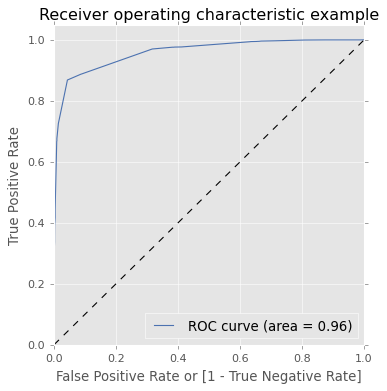

In [1018]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Insights:
* The ROC Curve must be in the upper left region of the graph.
* Here, we are getting a value close to 0.96 which is a very good score.

## Obtaining the optimal treshold:

In [1019]:
 numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()
## Obtaining the predicted values for different probablity thresholds.

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001161,4730,0,1,0,0,0,0,0,0,0,0,0
1,1,0.996538,5804,1,1,1,1,1,1,1,1,1,1,1
2,1,0.817711,900,1,1,1,1,1,1,1,1,1,1,0
3,0,0.035652,7778,0,1,0,0,0,0,0,0,0,0,0
4,0,0.195305,7906,0,1,1,0,0,0,0,0,0,0,0


In [1020]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378632  1.000000  0.000000
0.1   0.1  0.791872  0.969811  0.683444
0.2   0.2  0.902842  0.887631  0.912110
0.3   0.3  0.922845  0.865409  0.957844
0.4   0.4  0.922845  0.865409  0.957844
0.5   0.5  0.922845  0.865409  0.957844
0.6   0.6  0.922845  0.865409  0.957844
0.7   0.7  0.922845  0.865409  0.957844
0.8   0.8  0.887125  0.723690  0.986714
0.9   0.9  0.871884  0.675891  0.991313


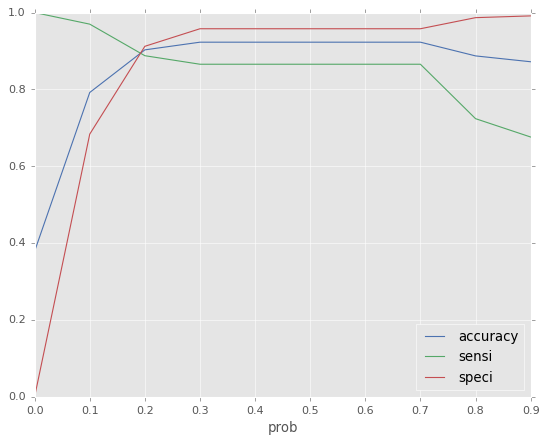

In [1021]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## Insights:
* Here, we can observe that the optimal cut off is near 0.2 .

## Analysis:

**Using "0.2" as the optimal threshold(cut-off point).** 

In [1022]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.001161,4730,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.996538,5804,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.817711,900,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.035652,7778,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.195305,7906,0,1,1,0,0,0,0,0,0,0,0,0


In [1023]:
y_train_pred_final=y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted']]
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,final_Predicted
0,0,0.001161,4730,0
1,1,0.996538,5804,1
2,1,0.817711,900,1
3,0,0.035652,7778,0
4,0,0.195305,7906,0


In [1024]:
# Let's check the overall accuracy.
print("Accuracy:",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

Accuracy: 0.9028417209080807


In [1025]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3570,  344],
       [ 268, 2117]], dtype=int64)

In [1026]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1027]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity:",TP/float(TP+FN))

Sensitivity: 0.8876310272536687


In [1028]:
# Let us calculate specificity
print("Specificity:",TN/float(TN+FP))

Specificity: 0.9121103730199285


In [1029]:
# Let us calculate precision
print("Precision:",TP/float(TP+FP))

Precision: 0.860219422998781


In [1030]:
# Let us calculate recall
print("Recall:",TP/float(TP+FN))

Recall: 0.8876310272536687


## Observations:
**For train data:**
</br> **Accuracy**: 0.9028417209080807
</br>**Sensitivity**: 0.8876310272536687
</br>**Specificity**: 0.9121103730199285

## Assigning the Lead Score:

In [1031]:
y_train_pred_final["Lead Score"]= y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead Score
0,0,0.001161,4730,0,0
1,1,0.996538,5804,1,100
2,1,0.817711,900,1,82
3,0,0.035652,7778,0,4
4,0,0.195305,7906,0,20


**Another way to analyse and obtain and go about with the analysis is the precision-recall approach**

In [1032]:
from sklearn.metrics import precision_recall_curve

In [1033]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

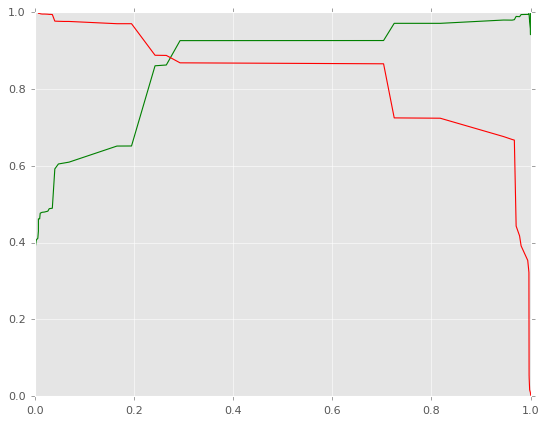

In [1034]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()
## Plotting the precision-recall curve

## Insights:
* Here the optimal trade-off for precision recall approach is obtained at a probablity threshold point greater than 0.2 .

# Data Preparation(Part 3):

## Scaling the test data:

In [1035]:
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_test.head()
## Scaling the numerical variables of test data set

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,...,Tags_wrong number given,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
9125,0,0.941157,-0.222460,-0.153332,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4382,0,3.295295,1.839351,-0.068271,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4061,0,-1.076676,-0.869772,-1.154049,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5544,0,0.268546,1.787713,-0.153332,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2769,0,4.640517,1.332197,-0.498579,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [1036]:
X_test = X_test[col]
X_test.head()
## Assigning the only columns that we selelcted in the final model.

,Lead_Source_Welingak Website,Last_Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off,Last_Notable_Activity_Modified
9125,0,0,0,0,0,0,0,0,0,1,0,0,0
4382,0,1,0,0,0,0,0,0,1,0,0,0,0
4061,0,1,0,0,0,0,0,0,1,0,0,0,0
5544,0,0,0,0,0,0,0,0,0,0,0,0,1
2769,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1037]:
X_test.shape
## We had only 13 columns remaining

(2700, 13)

## Predictions on the Test data set:

In [1038]:
X_test_sm = sm.add_constant(X_test)

In [1039]:
y_test_pred = res.predict(X_test_sm)

In [1040]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred
## Converting into an array

array([0.00512157, 0.99653833, 0.99653833, ..., 0.03565219, 0.19530485,
       0.99653833])

In [1041]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob':y_test_pred})
y_test_pred_final['Prospect ID'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.005122,9125
1,1,0.996538,4382
2,1,0.996538,4061
3,0,0.035652,5544
4,1,0.195305,2769


In [1042]:
y_test_pred_final['final_Predicted'] = y_test_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_test_pred_final.head()
## Getting predicted values for test data using the optimal thresholld of 0.2

,Converted,Converted_prob,Prospect ID,final_Predicted
0,0,0.005122,9125,0
1,1,0.996538,4382,1
2,1,0.996538,4061,1
3,0,0.035652,5544,0
4,1,0.195305,2769,0


### Lead Score for test data:

In [1043]:
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))
y_test_pred_final.head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.005122,9125,0,1
1,1,0.996538,4382,1,100
2,1,0.996538,4061,1,100
3,0,0.035652,5544,0,4
4,1,0.195305,2769,0,20


##  Analysis (For test data set):

In [1044]:
# Let's check the overall accuracy.
print("Accuracy:",metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_Predicted))

Accuracy: 0.902962962962963


In [1045]:
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_Predicted )
confusion

array([[1524,  144],
       [ 118,  914]], dtype=int64)

In [1046]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1047]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity:",TP/float(TP+FN))

Sensitivity: 0.8856589147286822


In [1048]:
# Let us calculate specificity
print("Specificity:",TN/float(TN+FP))

Specificity: 0.9136690647482014


In [1049]:
# Let us calculate precision
print("Precision:",TP/float(TP+FP))

Precision: 0.8638941398865785


In [1050]:
# Let us calculate recall
print("Recall:",TP/float(TP+FN))

Recall: 0.8856589147286822


## Observations:
**For test data:**
</br> **Accuracy**: 0.902962962962963
</br>**Sensitivity**: 0.8856589147286822
</br>**Specificity**: 0.9136690647482014

# Final Conclusions and Insights:


*When we used the **Sensitivity-Specificity trade off technique** , we obtained the optimal trade off point as **0.3**.*
</br>
</br>
**We obtained**:
</br>
</br>
**For train data:**
</br> **Accuracy**: 90.28%
</br>**Sensitivity**: 88.76%
</br>**Specificity**: 91.21%
</br>
</br>
**For test data:**
</br> **Accuracy**: 90.30%
</br>**Sensitivity**: 88.57%
</br>**Specificity**: 91.37%



**The factores that the company must watch out for since they contribute the most to the probablity that a lead will convert:**

* **Tags_Closed by Horizzon:** When the current status of the lead is that he/she is closed by Horizzon, that's when there is the most chance that a lead will convert.
</br>
</br>
* **Tags_Lost to EINS** : When the current status of the lead is that he/she has lost to ENIS, there is a very high chance that the lead will convert.
</br>
</br>
* **Tags_Will revert after reading the email:**  When the current status of the lead is that he/she will ervert back after reading the email, there is again, a good chance that the lead will convert.
</br>
</br>
* **Lead_Source_Welingak Website:** When the source of the lead obtained is the WElingak Website, there is a good chance of the lead converting.


**The factores that the company must ignore, since, they actually cause a lead to NOT convert:**

* **Tags_switched off:** When the status of a lead is that, he/she has switched off, it is almost certain that the lead is not going to convert.
</br>
</br>
* **Tags_Ringing:** Again, in most of the cases, if the lead is not picking up the call, he/she will most likely not convert.

## Final Model Formula:
**ln(p/(1-p))** = -1.4159 + 4.2668xLead_Source_Welingak Website + 2.2799xLast_Activity_SMS Sent - 3.1678xTags_Already a student + 7.2310xTags_Closed by Horizzon - 1.7441xTags_Interested in other courses + 6.8000xTags_Lost to EINS - 2.4789xTags_Not doing further education - 3.4599xTags_Ringing + 4.7986xTags_Will revert after reading the email - 3.8533xTags_invalid number - 2.0016xTags_opp hangup - 4.4623xTags_switched off - 1.8817xLast_Notable_Activity_Modified

## HOT Leads:
* **Now, since we selected a optimal cut off point as 0.2. When we run the model on new data, X Education Company can check the lead score and only pursue the leads that have a lead score of above 20. These are the required HOT leads.**
* **Since, We got a sensistivity of over 88%, our conversion rate for HOT leads will also be around 88% based on past data.**
</br>P.S: We got our leads conversion rate well over the required target of 80%.